In [14]:
import pandas as pd

# Load the Excel file
file_path = '/Users/bishalghosh/Desktop/Statistics/HRA.xlsx'
df = pd.read_excel(file_path)

# Display the first 5 rows of the dataframe
df.head()

,Year,Type of Hospital,ICD 10 Diagnostic Group,UNIT,VALUE
0,2013,General hospital psychiatric units,"Schizophrenia, schizotypal and delusional diso...",Number,2331
1,2013,General hospital psychiatric units,Depressive disorders,Number,2941
2,2013,General hospital psychiatric units,Mania,Number,1233
3,2013,General hospital psychiatric units,Neuroses,Number,775
4,2013,General hospital psychiatric units,Personality and behavioural disorders,Number,721


In [19]:
import numpy as np
from scipy.stats import mode, skew, kurtosis

# Helper function to calculate statistics for a grouped dataframe
def calculate_stats(grouped_df):
    # Calculating the required statistics
    mean = grouped_df.mean()
    median = grouped_df.median()
    mode_val = grouped_df.agg(lambda x: mode(x)[0])
    range_val = grouped_df.max() - grouped_df.min()
    variance = grouped_df.var()
    std_dev = grouped_df.std()
    skewness = grouped_df.skew()
    kurt = grouped_df.apply(kurtosis)
    q1 = grouped_df.quantile(0.25)
    q3 = grouped_df.quantile(0.75)
    iqr = q3 - q1

    # Combining all the statistics into a single dataframe
    stats_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Mode': mode_val,
        'Range': range_val,
        'Variance': variance,
        'Std Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr
    })

    return stats_df

# Scenario 1: Group by 'Year' and 'Type of Hospital'
group1 = df.groupby(['Year', 'Type of Hospital'])['VALUE']
stats1 = calculate_stats(group1)

# Scenario 2: Group by 'Year' and 'ICD 10 Diagnostic Group'
group2 = df.groupby(['Year', 'ICD 10 Diagnostic Group'])['VALUE']
stats2 = calculate_stats(group2)

# Scenario 3: Group by 'Type of Hospital' and 'ICD 10 Diagnostic Group'
group3 = df.groupby(['Type of Hospital', 'ICD 10 Diagnostic Group'])['VALUE']
stats3 = calculate_stats(group3)

In [35]:
stats1.head(30)

Mean  Median  \
Year Type of Hospital                                                          
2013 General hospital psychiatric units                  1468.285714   686.0   
     Independent/private and private charitable centres   630.142857   228.0   
     Psychiatric hospitals                                538.285714   228.0   
2014 General hospital psychiatric units                  1468.285714   686.0   
     Independent/private and private charitable centres   630.142857   228.0   
     Psychiatric hospitals                                538.285714   228.0   
2015 General hospital psychiatric units                  1489.285714   742.0   
     Independent/private and private charitable centres   606.857143   201.5   
     Psychiatric hospitals                                455.285714   222.5   
2016 General hospital psychiatric units                  1447.428571   740.5   
     Independent/private and private charitable centres   607.571429   164.0   
     Psychiatric hospitals                                415.000000   192.0   
2017 General hospital psychiatric units                  1436.571429   735.0   
     Independent/private and private charitable centres   584.857143   170.5   
     Psychiatric hospitals                                370.428571   157.0   
2018 General hospital psychiatric units                  1458.428571   759.0   
     Independent/private and private charitable centres   599.428571   251.5   
     Psychiatric hospitals                                370.714286   168.5   
2019 General hospital psychiatric units                  1448.000000   811.5   
     Independent/private and private charitable centres   580.571429   218.0   
     Psychiatric hospitals                                358.571429   168.0   
2020 General hospital psychiatric units                  1381.714286   623.5   
     Independent/private and private charitable centres   525.714286   203.0   
     Psychiatric hospitals                                291.285714   129.5   
2021 General hospital psychiatric units                  1468.000000   693.5   
     Independent/private and private charitable centres   536.857143   193.0   
     Psychiatric hospitals                                241.285714   111.5   
2022 General hospital psychiatric units                  1418.142857   580.0   
     Independent/private and private charitable centres   586.714286   180.5   
     Psychiatric hospitals                                250.857143   102.0   

                                                         Mode  Range  \
Year Type of Hospital                                                  
2013 General hospital psychiatric units                    13  10265   
     Independent/private and private charitable centres     1   4410   
     Psychiatric hospitals                                  2   3766   
2014 General hospital psychiatric units                    13  10265   
     Independent/private and private charitable centres     1   4410   
     Psychiatric hospitals                                  2   3766   
2015 General hospital psychiatric units                     8  10417   
     Independent/private and private charitable centres     3   4245   
     Psychiatric hospitals                                  0   3187   
2016 General hospital psychiatric units                     8  10124   
     Independent/private and private charitable centres     0   4253   
     Psychiatric hospitals                                  1   2904   
2017 General hospital psychiatric units                     4  10052   
     Independent/private and private charitable centres     0   4094   
     Psychiatric hospitals                                  3   2590   
2018 General hospital psychiatric units                     8  10201   
     Independent/private and private charitable centres     0   4196   
     Psychiatric hospitals                                  1   2594   
2019 General hospital psychiatric units                    10  

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Resetting the index to make 'Year' and 'Type of Hospital' as columns
stats1_reset = stats1.reset_index()

# Creating a figure with secondary_y (y-axis) for the line graph
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding bar graph for Mean
for hospital_type in stats1_reset['Type of Hospital'].unique():
    filtered_df = stats1_reset[stats1_reset['Type of Hospital'] == hospital_type]
    fig.add_trace(
        go.Bar(
            x=filtered_df['Year'], 
            y=filtered_df['Mean'], 
            name=f'Mean - {hospital_type}'
        ),
        secondary_y=False,
    )

# Adding line graph for Median
for hospital_type in stats1_reset['Type of Hospital'].unique():
    filtered_df = stats1_reset[stats1_reset['Type of Hospital'] == hospital_type]
    fig.add_trace(
        go.Scatter(
            x=filtered_df['Year'], 
            y=filtered_df['Median'], 
            name=f'Median - {hospital_type}', 
            mode='lines+markers'
        ),
        secondary_y=True,
    )

# Update layout
fig.update_layout(
    title_text="Mean and Median of VALUE Grouped by Year and Type of Hospital",
    barmode='group',
    height=600,  # Adjust the height of the graph
    width=1600,   # Adjust the width of the graph
)
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Mean VALUE", secondary_y=False)
fig.update_yaxes(title_text="Median VALUE", secondary_y=True)

fig.show()

In [74]:
import plotly.express as px

# Preparing the data for plotting
stats1_reset = stats1.reset_index()
plot_data = stats1_reset[['Year', 'Type of Hospital', 'Variance']]

# Creating a shaded line graph for the variance
fig = px.line(plot_data, x='Year', y='Variance', color='Type of Hospital',
              title='Variance of Values Grouped by Year and Type of Hospital',
              labels={'Variance': 'Variance of Values'},
              line_shape='spline')

# Adding shaded area under the line
fig.update_traces(line=dict(width=2.5), fill='tozeroy')

# Showing the graph
fig.show()


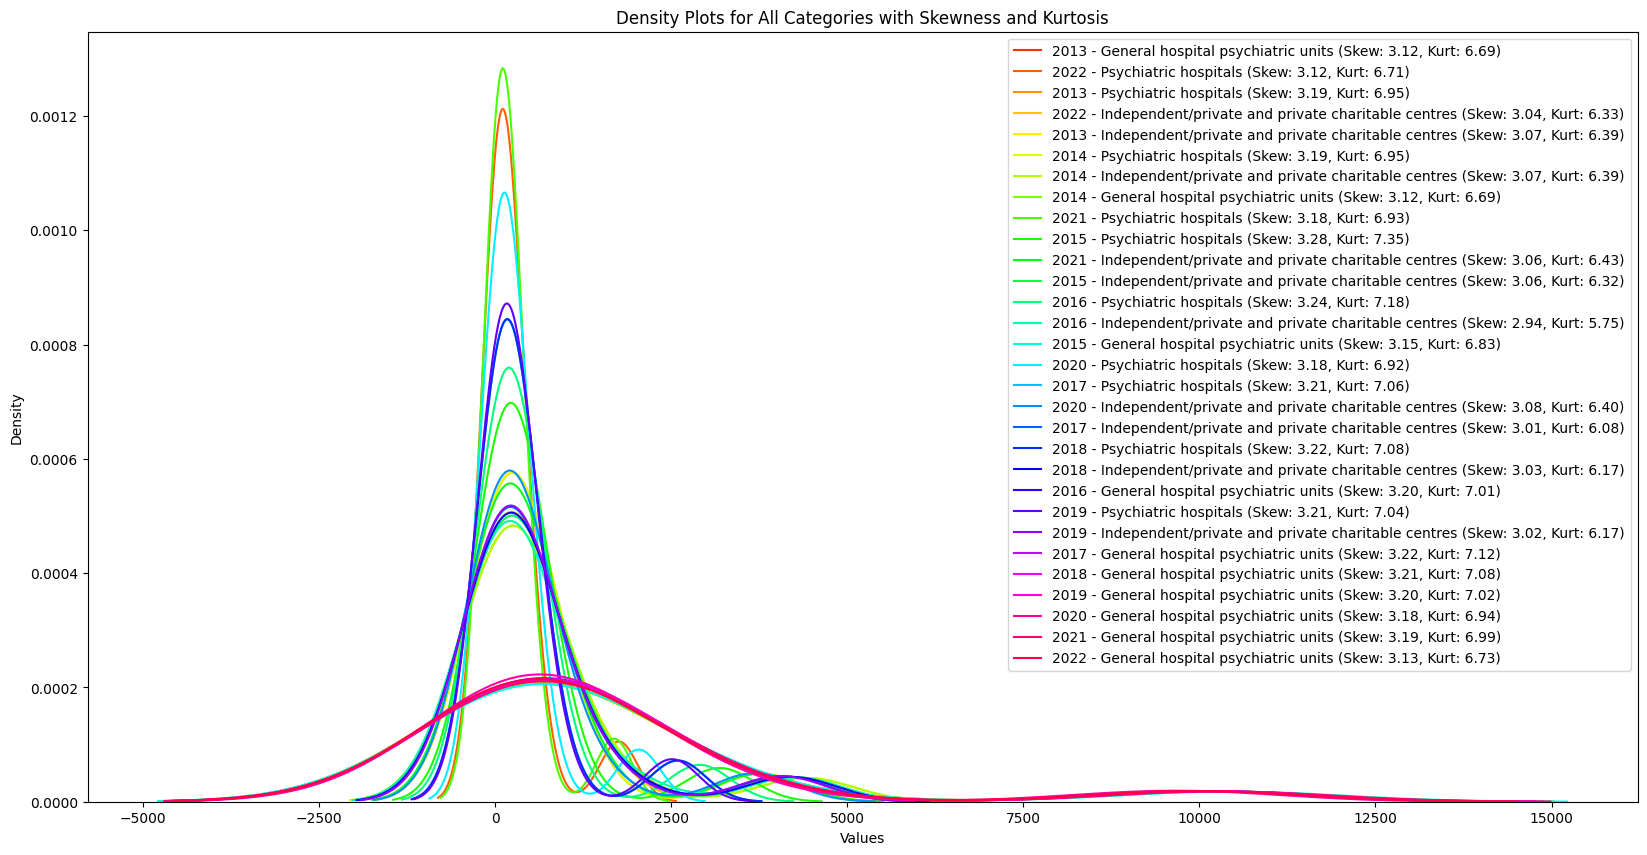

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_groups = df[['Year', 'Type of Hospital']].drop_duplicates()

data_for_plot = []

for index, row in unique_groups.iterrows():
    year = row['Year']
    hospital_type = row['Type of Hospital']

    # Filter the original dataframe for the specific group
    data = df[(df['Year'] == year) & (df['Type of Hospital'] == hospital_type)]['VALUE']

    # Add a dictionary with the data and metadata for the plot
    data_for_plot.append({
        'data': data,
        'label': f'{year} - {hospital_type}',
        'skew': data.skew(),
        'kurt': kurtosis(data, fisher=True)
    })

# Now, plot all the density plots in one figure
plt.figure(figsize=(20, 10))

# Creating a color palette
palette = sns.color_palette("hsv", len(data_for_plot))

for i, item in enumerate(data_for_plot):
    sns.kdeplot(item['data'], label=f'{item["label"]} (Skew: {item["skew"]:.2f}, Kurt: {item["kurt"]:.2f})', color=palette[i])

plt.title('Density Plots for All Categories with Skewness and Kurtosis')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()


In [73]:
import plotly.express as px

# Preparing the data for the box plots, extracting necessary statistics
box_data = []
for name, group in group1:
    year, hospital_type = name
    stats = calculate_stats(pd.DataFrame(group))
    stats_df = stats.reset_index()
    stats_df.rename(columns={'VALUE': 'statistic'}, inplace=True)
    stats_df['Year'] = year
    stats_df['Type of Hospital'] = hospital_type
    box_data.append(stats_df)

# Concatenating all the dataframes into one
box_data = pd.concat(box_data, ignore_index=True)

# Filter the dataframe for the boxplot-related statistics only
boxplot_data = box_data[['Year', 'Type of Hospital', 'Q1', 'Q3', 'Median', 'IQR']]

# Creating the box plot
fig = px.box(boxplot_data, x='Type of Hospital', y=['Q1', 'Median', 'Q3'],
             color='Year', points="all", labels={'variable': 'Statistic', 'value': 'Value'},
             hover_data={'IQR': True})

# Customizing the layout
fig.update_layout(
    title='Box Plots for Each Group of Year and Type of Hospital',
    xaxis_title='Type of Hospital',
    yaxis_title='Values',
    legend_title='Year'
)

# Show the plot
fig.show()


In [37]:
stats2.head(42)

Mean  Median  \
Year ICD 10 Diagnostic Group                                                   
2013 Alcoholic disorders                                  490.000000   591.0   
     All disorders                                       6152.333333  4411.0   
     Behavioural, emotional disorders of childhood a...     7.666667     6.0   
     Depressive disorders                                1751.000000  1543.0   
     Development disorders                                  9.666667     9.0   
     Eating disorders                                      72.333333    48.0   
     Intellectual disability                               32.333333    30.0   
     Mania                                                694.333333   431.0   
     Neuroses                                             548.666667   653.0   
     Organic mental disorders                             190.666667   179.0   
     Other and unspecified                                458.000000   401.0   
     Other drug disorders                                 296.666667   188.0   
     Personality and behavioural disorders                370.666667   259.0   
     Schizophrenia, schizotypal and delusional disor...  1230.333333  1040.0   
2014 Alcoholic disorders                                  490.000000   591.0   
     All disorders                                       6152.333333  4411.0   
     Behavioural, emotional disorders of childhood a...     7.666667     6.0   
     Depressive disorders                                1751.000000  1543.0   
     Development disorders                                  9.666667     9.0   
     Eating disorders                                      72.333333    48.0   
     Intellectual disability                               32.333333    30.0   
     Mania                                                694.333333   431.0   
     Neuroses                                             548.666667   653.0   
     Organic mental disorders                             190.666667   179.0   
     Other and unspecified                                458.000000   401.0   
     Other drug disorders                                 296.666667   188.0   
     Personality and behavioural disorders                370.666667   259.0   
     Schizophrenia, schizotypal and delusional disor...  1230.333333  1040.0   
2015 Alcoholic disorders                                  396.000000   447.0   
     All disorders                                       5953.333333  4248.0   
     Behavioural, emotional disorders of childhood a...     6.000000     5.0   
     Depressive disorders                                1602.000000  1518.0   
     Development disorders                                 13.333333    12.0   
     Eating disorders                                      49.333333    36.0   
     Intellectual disability                               34.000000    30.0   
     Mania                                                639.000000   405.0   
     Neuroses                                             561.000000   601.0   
     Organic mental disorders                             189.000000   202.0   
     Other and unspecified                                470.000000   342.0   
     Other drug disorders                                 344.000000   226.0   
     Personality and behavioural disorders                459.666667   339.0   
     Schizophrenia, schizotypal and delusional disor...  1190.000000   801.0   

                                                         Mode  Range  \
Year ICD 10 Diagnostic Group                                           
2013 Alcoholic disorders                                  191    497   
     All disorders                                       3768   6510   
     Behavioural, emotional disorders of childhood a...     4      9   
     Depressive disorders                                 769   2172   
     Development disorders                                  1     18   
     Eating disorders                  

In [34]:
stats3

Mean  \
Type of Hospital                                   ICD 10 Diagnostic Group                                       
General hospital psychiatric units                 Alcoholic disorders                                   471.2   
                                                   All disorders                                       10138.9   
                                                   Behavioural, emotional disorders of childhood a...      9.6   
                                                   Depressive disorders                                 2424.1   
                                                   Development disorders                                  31.2   
                                                   Eating disorders                                       41.2   
                                                   Intellectual disability                                56.0   
                                                   Mania                                                1190.9   
                                                   Neuroses                                              854.6   
                                                   Organic mental disorders                              187.4   
                                                   Other and unspecified                                 843.2   
                                                   Other drug disorders                                  661.4   
                                                   Personality and behavioural disorders                 911.3   
                                                   Schizophrenia, schizotypal and delusional disor...   2456.8   
Independent/private and private charitable centres Alcoholic disorders                                   538.3   
                                                   All disorders                                        4122.2   
                                                   Behavioural, emotional disorders of childhood a...      5.8   
                                                   Depressive disorders                                 1465.1   
                                                   Development disorders                                   6.1   
                                                   Eating disorders                                      130.6   
                                                   Intellectual disability                                 0.7   
                                                   Mania                                                 315.9   
                                                   Neuroses                                              582.6   
                                                   Organic mental disorders                              113.5   
                                                   Other and unspecified                                 365.8   
                                                   Other drug disorders                                  121.7   
                                                   Personality and behavioural disorders                 185.5   
                                                   Schizophrenia, schizotypal and delusional disor...    290.6   
Psychiatric hospitals                              Alcoholic disorders                                   113.8   
                                                   All disorders                                        2681.0   
                                                   Behavioural, emotional disorders of childhood a...      2.7   
                                                   Depressive disorders                                  449.9   
                                                   Development disorders                                   8.2   
                                                   Eating disorders                                        2.7   
  